In [1]:
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

from mean_variance_portfolio import MeanVariancePortfolio
from variance_reduction import VarianceReduction
from error_metrics import ErrorMetrics

In [2]:
cwd = os.getcwd()
file_dir = os.path.join(cwd, 'Stocks_v.csv')

stock_data = pd.read_csv(file_dir) ## Stock data consists 10yr monthly returns data

stock_data = stock_data.drop(['PERMNO'], axis=1)

print(stock_data.head())

         date TICKER       RET      RETX
0  31-01-2014    XOM -0.089328 -0.089328
1  28-02-2014    XOM  0.051432  0.044596
2  31-03-2014    XOM  0.014646  0.014646
3  30-04-2014    XOM  0.048423  0.048423
4  30-05-2014    XOM -0.011620 -0.018358


In [121]:
MVP = MeanVariancePortfolio(stock_data)

ret_mvp, W_mvp, var_mvp = MVP.mean_variance()

sigma_eff, return_eff = MVP.simulate_efficient_frontier()

sigma_sim, return_sim, _ = MVP.simulated_portfolios(10000)

print(f'Expected Return (MVP):   {ret_mvp:0.8f}')
print(f'Variance (MVP):          {var_mvp:0.8f}')
print(f'Weights (MVP):           {W_mvp}')

Expected Return (MVP):   0.00891281
Variance (MVP):          0.00101574
Weights (MVP):           [ 0.20255166  0.06359329 -0.13817115 -0.0635115   0.24676046 -0.11179506
 -0.0372397   0.05169321  0.08773159  0.12667283 -0.05688699  0.23469444
  0.18882701  0.15092389 -0.08299858 -0.00745554  0.07766664  0.00788634
  0.00138995  0.0576672 ]


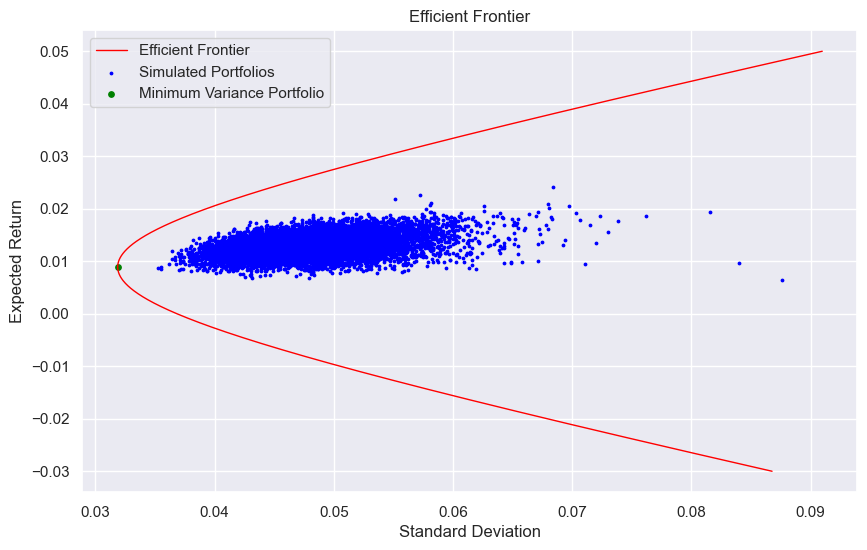

In [100]:
plt.figure(figsize=(10, 6))
plt.plot(sigma_eff, return_eff, color='red', linewidth=1)
plt.scatter(sigma_sim, return_sim, color='blue', s=3)
plt.scatter(np.sqrt(var_mvp), ret_mvp, color='green', s=15)
plt.legend(['Efficient Frontier', 'Simulated Portfolios', 'Minimum Variance Portfolio'])
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.show()

In [129]:
methods = VarianceReduction(MVP, 1000, 2400)

Er, W, var = methods.MC()

print('Expected Return (MC):   ', Er)
print('Variance (MC):          ', var)
print('Weights (MC):           ', W)

Expected Return (MC):    {2: np.float64(0.010181417049432286), 3: np.float64(0.010650498063592168), 4: np.float64(0.010856564053664539), 5: np.float64(0.007767878554659758), 6: np.float64(0.010597466365040055), 7: np.float64(0.012844232493504752), 8: np.float64(0.013180745040711837), 9: np.float64(0.009912995249886354)}
Variance (MC):           {2: np.float64(0.00037209285438568224), 3: np.float64(0.00040009573074855465), 4: np.float64(0.0003944207131159747), 5: np.float64(0.0004512928904079978), 6: np.float64(0.0005183948266092624), 7: np.float64(0.0007467734052667534), 8: np.float64(0.0008238478503218525), 9: np.float64(0.0010041060817969848)}
Weights (MC):            {2: array([0.05300406, 0.03967705, 0.03757306, 0.04036008, 0.05072999,
       0.07801042, 0.04791879, 0.04618319, 0.05154774, 0.06169026,
       0.03947268, 0.07821336, 0.05601348, 0.07403246, 0.0629032 ,
       0.00776124, 0.02505756, 0.04873627, 0.04146099, 0.05965413]), 3: array([ 6.15485396e-02,  3.85656252e-02,  3.

In [9]:
# Calculate error metrics for each key in Er, W, and var
MSE_WeightsMC = []
MAE_WeightsMC = []

for key in W:
    error = ErrorMetrics(W_mvp, W[key])
    MSE_WeightsMC.append(error.MSE())
    MAE_WeightsMC.append(error.MAE())

print('MSE of Weights (MC):', MSE_WeightsMC)
print('MAE of Weights (MC):', MAE_WeightsMC)

MSE of Weights (MC): [0.011804990815986379, 0.010889821075106372, 0.010512371212195167, 0.01016591289546159, 0.010041730883341348, 0.00804794723341141, 0.005160884208290047, 0.002729920218704707]
MAE of Weights (MC): [0.0892734762190612, 0.08398953781923355, 0.08211051748810891, 0.0823037596768244, 0.08415325865243806, 0.07005163863658238, 0.05667685555567772, 0.03690270385716614]


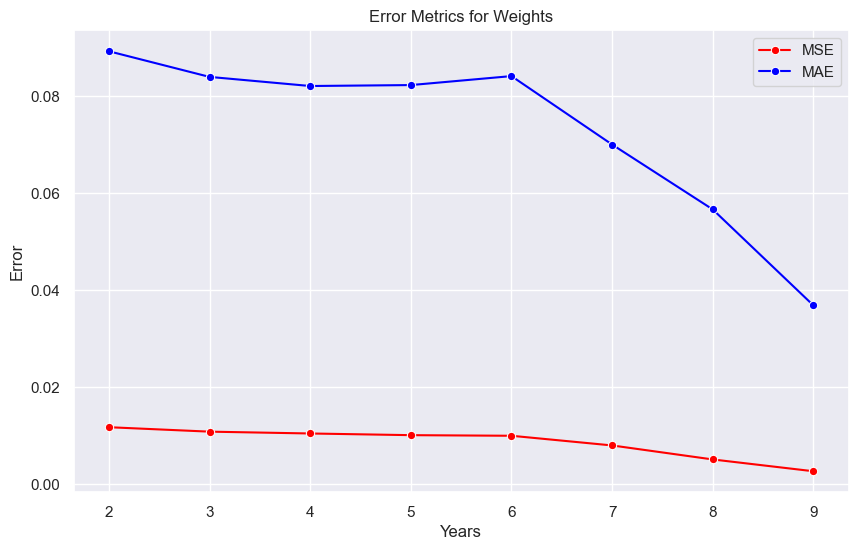

In [10]:
# Plot MSE and MAE for weights for years in range 2 to 8
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(W.keys()), y=MSE_WeightsMC, color='red', label='MSE', marker='o')
sns.lineplot(x=list(W.keys()), y=MAE_WeightsMC, color='blue', label='MAE', marker='o')
plt.xlabel('Years')
plt.ylabel('Error')
plt.title('Error Metrics for Weights')
plt.legend()
plt.show()

MSE of Variance (MC): [np.float64(4.1124355400659865e-07), np.float64(3.8056785576141705e-07), np.float64(3.8528105186002206e-07), np.float64(3.1724578584590313e-07), np.float64(2.446657932678922e-07), np.float64(7.227629917281051e-08), np.float64(3.7128187786475356e-08), np.float64(1.4131981948622223e-10)]
MAE of Variance (MC): [np.float64(0.000641282741079626), np.float64(0.0006169018201962263), np.float64(0.0006207101190249939), np.float64(0.0005632457597229678), np.float64(0.0004946370318404114), np.float64(0.00026884251742016274), np.float64(0.00019268676079709098), np.float64(1.18878012889778e-05)]


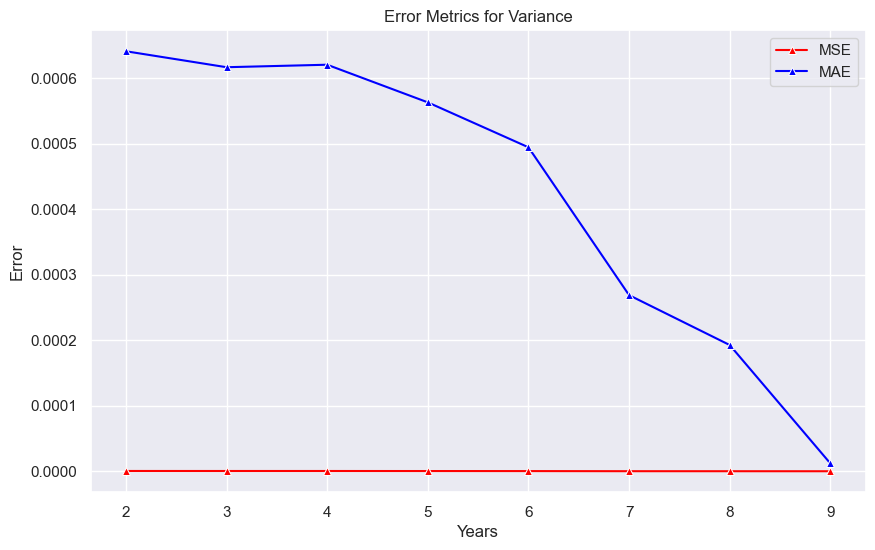

In [11]:
# Calculate error metrics for Var
MSE_varMC = []
MAE_varMC = []

for key in var:
    error = ErrorMetrics(var_mvp, var[key])
    MSE_varMC.append(error.MSE())
    MAE_varMC.append(error.MAE())

print('MSE of Variance (MC):', MSE_varMC)
print('MAE of Variance (MC):', MAE_varMC)

# Plot MSE and MAE for variance for years in range 2 to 8
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(var.keys()), y=MSE_varMC, color='red', label='MSE', marker='^')
sns.lineplot(x=list(var.keys()), y=MAE_varMC, color='blue', label='MAE', marker='^')
plt.xlabel('Years')
plt.ylabel('Error')
plt.title('Error Metrics for Variance')
plt.legend()
plt.show()

In [12]:
# Perform Monte Carlo simulation with antithetic variates
Er_anti, W_anti, var_anti = methods.MC_antithetic_variates()

# Print the results
print('Expected Return (MC Antithetic Variates):   ', Er_anti)
print('Variance (MC Antithetic Variates):          ', var_anti)
print('Weights (MC Antithetic Variates):           ', W_anti)

Expected Return (MC Antithetic Variates):    {2: np.float64(0.015240274471571892), 3: np.float64(0.012940323251045745), 4: np.float64(0.008137044525170608), 5: np.float64(0.007155655709668803), 6: np.float64(0.010354630621147925), 7: np.float64(0.01196434455089643), 8: np.float64(0.011860911799173387), 9: np.float64(0.009946975346011442)}
Variance (MC Antithetic Variates):           {2: np.float64(0.00044342478179231604), 3: np.float64(0.0005027904523942033), 4: np.float64(0.00050776485649159), 5: np.float64(0.0006006972706093153), 6: np.float64(0.0005439627855523961), 7: np.float64(0.0007842614265293134), 8: np.float64(0.000881703350305496), 9: np.float64(0.0010256956279110915)}
Weights (MC Antithetic Variates):            {2: array([ 0.02226669,  0.03067085,  0.06027788,  0.04219703,  0.0357092 ,
        0.17158414,  0.02637943,  0.05060575,  0.07905301, -0.00598566,
        0.04024827,  0.07961805,  0.02734348,  0.04021382,  0.09905276,
       -0.01858883,  0.00462634,  0.06040062, 

MSE of Weights (MC Antithetic Variates): [0.017423330779641637, 0.00958590740790358, 0.010999235244242503, 0.012699977509634858, 0.007815691692459022, 0.011196093738765293, 0.009161956478755557, 0.006830447097473208]
MAE of Weights (MC Antithetic Variates): [0.10781267889028279, 0.07564055519732928, 0.08091657273424739, 0.08687738910697144, 0.0692727993909569, 0.07911965664777482, 0.07039559988938995, 0.05564077373780764]


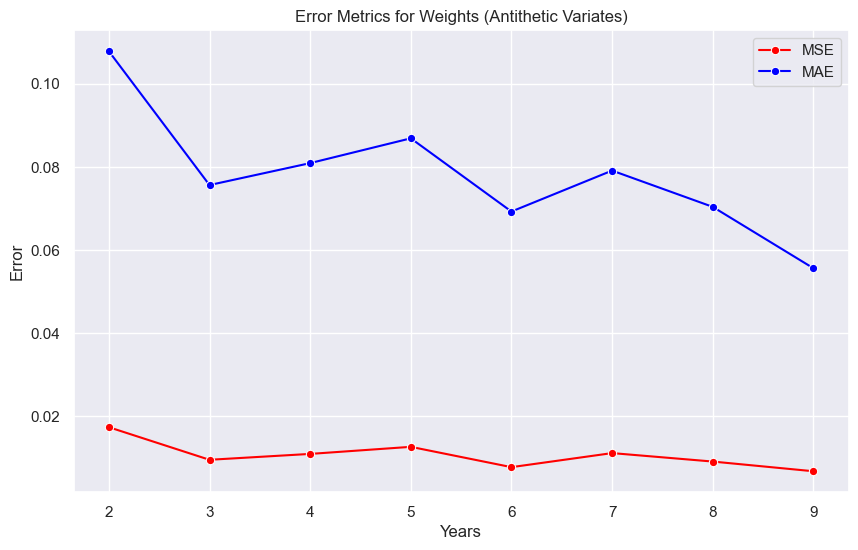

In [13]:
# Calculate error metrics for weights using antithetic variates
MSE_WeightsMC_anti = []
MAE_WeightsMC_anti = []

for key in W_anti:
    error = ErrorMetrics(W_mvp, W_anti[key])
    MSE_WeightsMC_anti.append(error.MSE())
    MAE_WeightsMC_anti.append(error.MAE())

print('MSE of Weights (MC Antithetic Variates):', MSE_WeightsMC_anti)
print('MAE of Weights (MC Antithetic Variates):', MAE_WeightsMC_anti)

# Plot MSE and MAE for weights for years in range 2 to 8 using seaborn library
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(W_anti.keys()), y=MSE_WeightsMC_anti, color='red', label='MSE', marker='o')
sns.lineplot(x=list(W_anti.keys()), y=MAE_WeightsMC_anti, color='blue', label='MAE', marker='o')
plt.xlabel('Years')
plt.ylabel('Error')
plt.title('Error Metrics for Weights (Antithetic Variates)')
plt.legend()
plt.show()

MSE of Variance (MC Antithetic Variates): [np.float64(3.2754176118669873e-07), np.float64(2.6311459635710107e-07), np.float64(2.5803613001205867e-07), np.float64(1.7225832947478267e-07), np.float64(2.2257131010552665e-07), np.float64(5.3581137710802106e-08), np.float64(1.7965133088187083e-08), np.float64(9.91658119812529e-11)]
MAE of Variance (MC Antithetic Variates): [np.float64(0.0005723126428681257), np.float64(0.0005129469722662383), np.float64(0.0005079725681688517), np.float64(0.00041504015405112633), np.float64(0.00047177463910804557), np.float64(0.0002314759981311283), np.float64(0.0001340340743549456), np.float64(9.958203250649833e-06)]


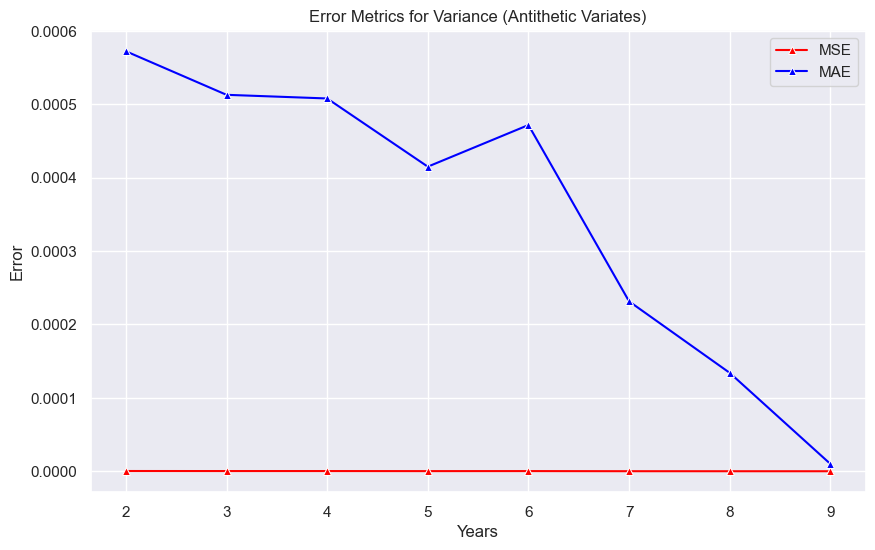

In [14]:
# Calculate error metrics for variance using antithetic variates
MSE_varMC_anti = []
MAE_varMC_anti = []

for key in var_anti:
    error = ErrorMetrics(var_mvp, var_anti[key])
    MSE_varMC_anti.append(error.MSE())
    MAE_varMC_anti.append(error.MAE())

# Print the error metrics
print('MSE of Variance (MC Antithetic Variates):', MSE_varMC_anti)
print('MAE of Variance (MC Antithetic Variates):', MAE_varMC_anti)

# Plot MSE and MAE for variance for years in range 2 to 8 using seaborn library
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(var_anti.keys()), y=MSE_varMC_anti, color='red', label='MSE', marker='^')
sns.lineplot(x=list(var_anti.keys()), y=MAE_varMC_anti, color='blue', label='MAE', marker='^')
plt.xlabel('Years')
plt.ylabel('Error')
plt.title('Error Metrics for Variance (Antithetic Variates)')
plt.legend()
plt.show()

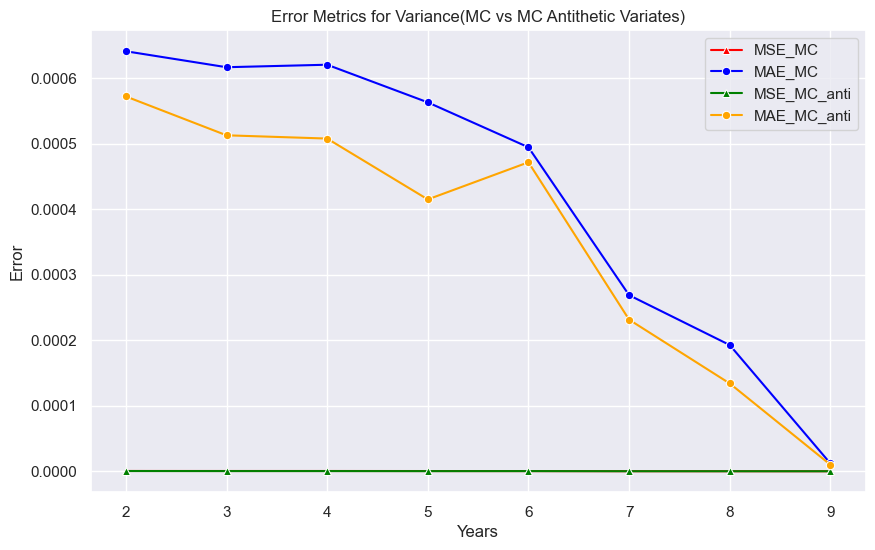

In [15]:
## PLot comparison of MSE and MAE for variance in MC and MC_antithetic_variates for years
plt.figure(figsize=(10, 6))
sns.lineplot(x = range(2,10), y = MSE_varMC, color = 'red', label = 'MSE_MC', marker = '^')
sns.lineplot(x = range(2,10), y = MAE_varMC, color = 'blue', label = 'MAE_MC', marker = 'o')
sns.lineplot(x = range(2,10), y = MSE_varMC_anti, color = 'green', label = 'MSE_MC_anti', marker = '^')
sns.lineplot(x = range(2,10), y = MAE_varMC_anti, color = 'orange', label = 'MAE_MC_anti', marker = 'o')
plt.xlabel('Years')
plt.ylabel('Error')
plt.title('Error Metrics for Variance(MC vs MC Antithetic Variates)')
plt.legend()
plt.show()

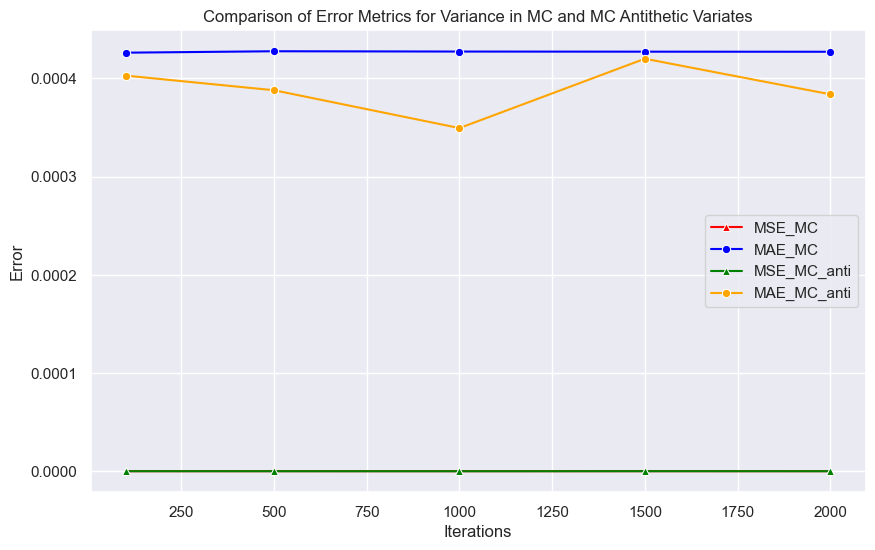

In [16]:
## Simulate MC and MC_antithetic_variates for 100, 500, 1000, 1500, 2000 iterations and plot comparison of the error metrics
iterations = [100, 500, 1000, 1500, 2000]
MSE_varMC_sim = []
MAE_varMC_sim = []
MSE_varMC_anti_sim = []
MAE_varMC_anti_sim = []

for i in iterations:
    methods_sim = VarianceReduction(MVP, i, 2400)
    Er, W, var = methods_sim.MC()
    Er_anti, W_anti, var_anti = methods_sim.MC_antithetic_variates()

    # Calculate the average error metrics for all keys
    mse_mc = np.mean([ErrorMetrics(var_mvp, var[key]).MSE() for key in var])
    mae_mc = np.mean([ErrorMetrics(var_mvp, var[key]).MAE() for key in var])
    mse_anti = np.mean([ErrorMetrics(var_mvp, var_anti[key]).MSE() for key in var_anti])
    mae_anti = np.mean([ErrorMetrics(var_mvp, var_anti[key]).MAE() for key in var_anti])

    MSE_varMC_sim.append(mse_mc)
    MAE_varMC_sim.append(mae_mc)
    MSE_varMC_anti_sim.append(mse_anti)
    MAE_varMC_anti_sim.append(mae_anti)

# Plot comparison of the error metrics
plt.figure(figsize=(10, 6))
sns.lineplot(x=iterations, y=MSE_varMC_sim, color='red', label='MSE_MC', marker='^')
sns.lineplot(x=iterations, y=MAE_varMC_sim, color='blue', label='MAE_MC', marker='o')
sns.lineplot(x=iterations, y=MSE_varMC_anti_sim, color='green', label='MSE_MC_anti', marker='^')
sns.lineplot(x=iterations, y=MAE_varMC_anti_sim, color='orange', label='MAE_MC_anti', marker='o')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Comparison of Error Metrics for Variance in MC and MC Antithetic Variates')
plt.legend()
plt.show()

In [30]:
# Perform Monte Carlo simulation with moment matching
mean_MM, W_MM, var_MM = methods.MC_moment_matching()

print('Expected Return (MC Moment Matching):   ', mean_MM)
print('Variance (MC Moment Matching):          ', var_MM)
print('Weights (MC Moment Matching):           ', W_MM)

Expected Return (MC Moment Matching):    {2: np.float64(0.01184071348182741), 3: np.float64(0.010905015200692232), 4: np.float64(0.010813318069876208), 5: np.float64(0.008911063166063897), 6: np.float64(0.010450144641765536), 7: np.float64(0.012391139940752291), 8: np.float64(0.012965845192473248), 9: np.float64(0.009923766517711555)}
Variance (MC Moment Matching):           {2: np.float64(0.00038734308819556593), 3: np.float64(0.0004047902554694842), 4: np.float64(0.00040531329071405437), 5: np.float64(0.0004652099365160933), 6: np.float64(0.0005351843869655811), 7: np.float64(0.0007489911290720007), 8: np.float64(0.0008268102321463951), 9: np.float64(0.0010028637599257472)}
Weights (MC Moment Matching):            {2: array([0.05305951, 0.04258234, 0.03751621, 0.04212607, 0.05085228,
       0.07751483, 0.04615574, 0.04827786, 0.05205726, 0.06182349,
       0.03948254, 0.08027677, 0.05830234, 0.07178679, 0.06397978,
       0.00322728, 0.02609887, 0.04895445, 0.03773321, 0.05819236]), 

MSE of Weights (MC Moment Matching): [0.01176462434434986, 0.010957398363831496, 0.010534075042801069, 0.010317026440088504, 0.010223114030448227, 0.00799161813359223, 0.005299935872698261, 0.0026918459375582225]
MAE of Weights (MC Moment Matching): [0.08859975150635434, 0.08426367034202428, 0.08239213707939674, 0.08256969527913771, 0.08479500768441388, 0.06985807936308719, 0.05724267405318713, 0.036908651082459616]


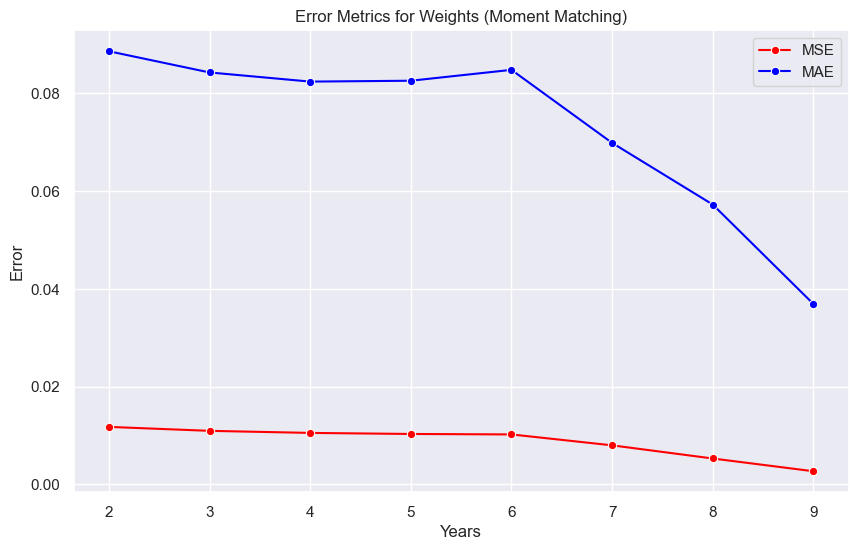

In [31]:
# Calculate error metrics for weights using moment matching
MSE_WeightsMC_MM = []
MAE_WeightsMC_MM = []

for key in W_MM:
    error = ErrorMetrics(W_mvp, W_MM[key])
    MSE_WeightsMC_MM.append(error.MSE())
    MAE_WeightsMC_MM.append(error.MAE())

# Print the error metrics
print('MSE of Weights (MC Moment Matching):', MSE_WeightsMC_MM)
print('MAE of Weights (MC Moment Matching):', MAE_WeightsMC_MM)

# Plot MSE and MAE for weights for years in range 2 to 8 using seaborn library
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(W_MM.keys()), y=MSE_WeightsMC_MM, color='red', label='MSE', marker='o')
sns.lineplot(x=list(W_MM.keys()), y=MAE_WeightsMC_MM, color='blue', label='MAE', marker='o')
plt.xlabel('Years')
plt.ylabel('Error')
plt.title('Error Metrics for Weights (Moment Matching)')
plt.legend()
plt.show()

MSE of Variance (MC Moment Matching): [np.float64(3.9487944210113143e-07), np.float64(3.732564435424443e-07), np.float64(3.7261762330419687e-07), np.float64(3.0308051520252563e-07), np.float64(2.3093122203775808e-07), np.float64(7.115358621015593e-08), np.float64(3.569348407123961e-08), np.float64(1.6573124370131483e-10)]
MAE of Variance (MC Moment Matching): [np.float64(0.0006283943364648757), np.float64(0.0006109471691909574), np.float64(0.0006104241339463872), np.float64(0.0005505274881443484), np.float64(0.00048055303769486057), np.float64(0.000266746295588441), np.float64(0.00018892719251404656), np.float64(1.2873664734694423e-05)]


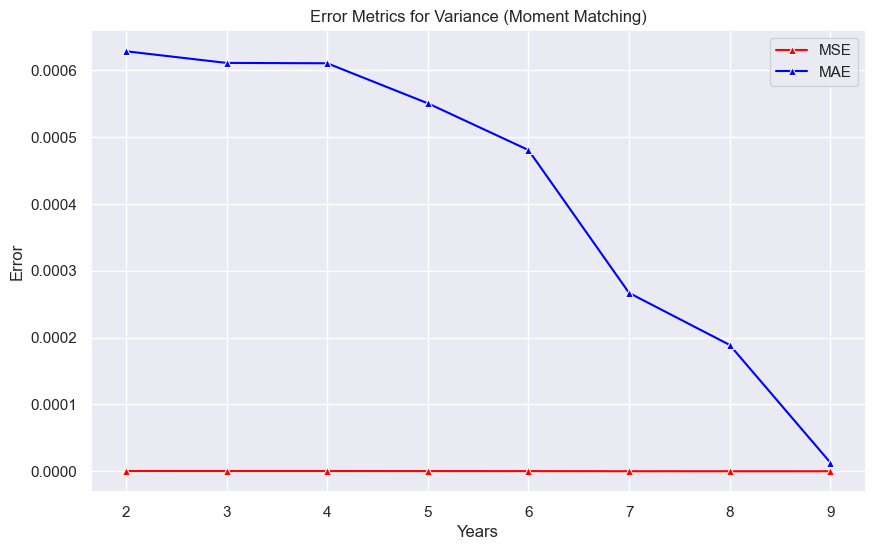

In [32]:
# Calculate error metrics for variance using moment matching
MSE_varMC_MM = []
MAE_varMC_MM = []

for key in var_MM:
    error = ErrorMetrics(var_mvp, var_MM[key])
    MSE_varMC_MM.append(error.MSE())
    MAE_varMC_MM.append(error.MAE())

# Print the error metrics
print('MSE of Variance (MC Moment Matching):', MSE_varMC_MM)
print('MAE of Variance (MC Moment Matching):', MAE_varMC_MM)

# Plot MSE and MAE for variance for years in range 2 to 8 using seaborn library
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(var_MM.keys()), y=MSE_varMC_MM, color='red', label='MSE', marker='^')
sns.lineplot(x=list(var_MM.keys()), y=MAE_varMC_MM, color='blue', label='MAE', marker='^')
plt.xlabel('Years')
plt.ylabel('Error')
plt.title('Error Metrics for Variance (Moment Matching)')
plt.legend()
plt.show()

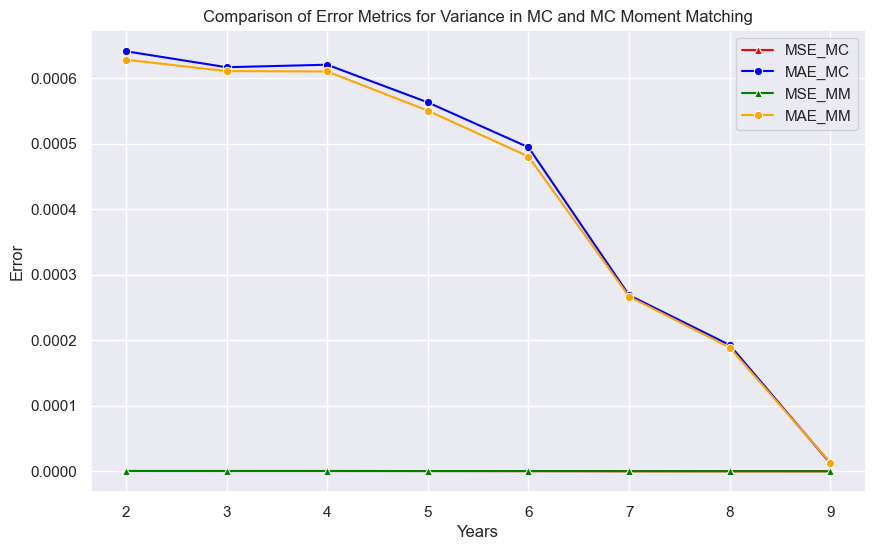

In [33]:
# Plot comparison of MSE and MAE for variance in MC and MC moment matching
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(2, 10), y=MSE_varMC, color='red', label='MSE_MC', marker='^')
sns.lineplot(x=range(2, 10), y=MAE_varMC, color='blue', label='MAE_MC', marker='o')
sns.lineplot(x=range(2, 10), y=MSE_varMC_MM, color='green', label='MSE_MM', marker='^')
sns.lineplot(x=range(2, 10), y=MAE_varMC_MM, color='orange', label='MAE_MM', marker='o')
plt.xlabel('Years')
plt.ylabel('Error')
plt.title('Comparison of Error Metrics for Variance in MC and MC Moment Matching')
plt.legend()
plt.show()

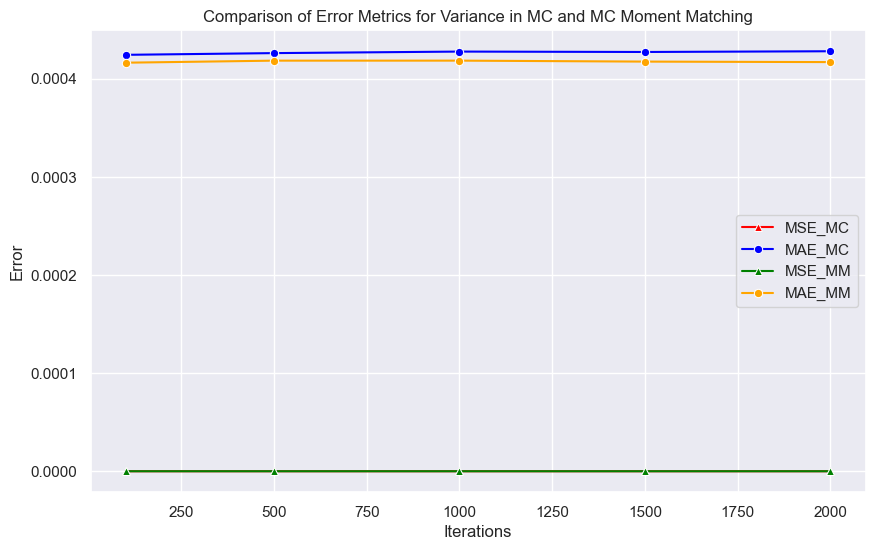

In [21]:
iterations = [100, 500, 1000, 1500, 2000]
MSE_varMC_sim2 = []
MAE_varMC_sim2 = []
MSE_varMC_sim_MM = []
MAE_varMC_sim_MM = []

for i in iterations:
    methods_sim = VarianceReduction(MVP, i, 2400)
    Er, W, var = methods_sim.MC()
    mean_MM, W_MM, var_MM = methods_sim.MC_moment_matching()

    # Calculate the mean error for this iteration count using list comprehensions
    mse_mc = np.mean([ErrorMetrics(var_mvp, var[key]).MSE() for key in var])
    mae_mc = np.mean([ErrorMetrics(var_mvp, var[key]).MAE() for key in var])
    mse_mm = np.mean([ErrorMetrics(var_mvp, var_MM[key]).MSE() for key in var_MM])
    mae_mm = np.mean([ErrorMetrics(var_mvp, var_MM[key]).MAE() for key in var_MM])

    MSE_varMC_sim2.append(mse_mc)
    MAE_varMC_sim2.append(mae_mc)
    MSE_varMC_sim_MM.append(mse_mm)
    MAE_varMC_sim_MM.append(mae_mm)

# Plot comparison of MSE and MAE for variance for different iteration counts
plt.figure(figsize=(10, 6))
sns.lineplot(x=iterations, y=MSE_varMC_sim2, color='red', label='MSE_MC', marker='^')
sns.lineplot(x=iterations, y=MAE_varMC_sim2, color='blue', label='MAE_MC', marker='o')
sns.lineplot(x=iterations, y=MSE_varMC_sim_MM, color='green', label='MSE_MM', marker='^')
sns.lineplot(x=iterations, y=MAE_varMC_sim_MM, color='orange', label='MAE_MM', marker='o')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Comparison of Error Metrics for Variance in MC and MC Moment Matching')
plt.legend()
plt.show()

In [135]:
## Perform Monte Carlo simulation with control variates
Er_CV, W_CV, var_CV = methods.MC_control_variates(n=5)

# print('Expected Return (MC Control Variates):   ', Er_CV)
# print('Variance (MC Control Variates):          ', var_CV)
# print('Weights (MC Control Variates):           ', W_CV)

MSE of Weights (MC Control Variates): [0.010190641133553622, 0.010641021518118361, 0.008770000255817994, 0.012904509940974748, 0.011175194806357067, 0.00973962048984284, 0.0058062461721997615, 0.002232584791155512]
MAE of Weights (MC Control Variates): [0.08323155524764925, 0.08265451980898604, 0.07733799045438924, 0.08842853628090508, 0.08967562205032861, 0.07001140086255431, 0.0624722489550298, 0.03519878118595101]


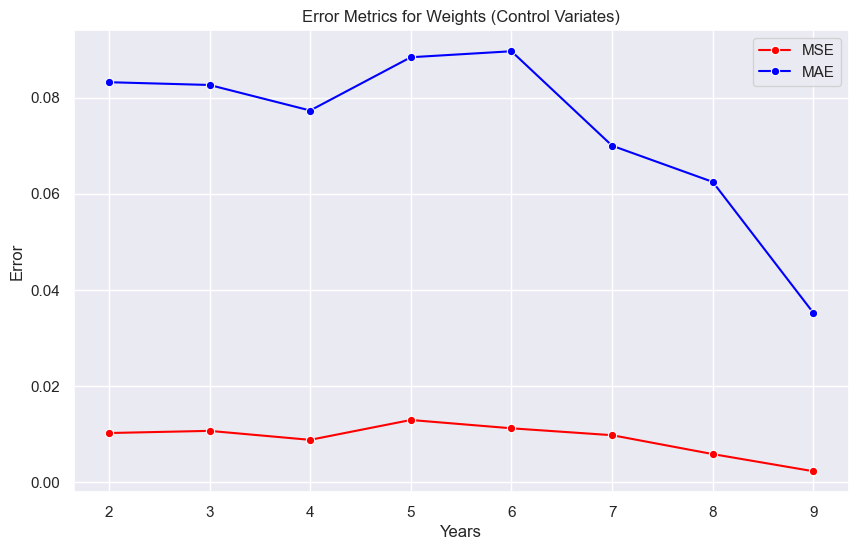

In [136]:
## Calculate error metrics for weights using control variates
MSE_WeightsMC_CV = []
MAE_WeightsMC_CV = []

for key in W_CV:
    error = ErrorMetrics(W_mvp, W_CV[key])
    MSE_WeightsMC_CV.append(error.MSE())
    MAE_WeightsMC_CV.append(error.MAE())
    
print('MSE of Weights (MC Control Variates):', MSE_WeightsMC_CV)
print('MAE of Weights (MC Control Variates):', MAE_WeightsMC_CV)

## Plot MSE and MAE for weights for years in range 2 to 8 using seaborn library
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(W_CV.keys()), y=MSE_WeightsMC_CV, color='red', label='MSE', marker='o')
sns.lineplot(x=list(W_CV.keys()), y=MAE_WeightsMC_CV, color='blue', label='MAE', marker='o')
plt.xlabel('Years')
plt.ylabel('Error')
plt.title('Error Metrics for Weights (Control Variates)')
plt.legend()
plt.show()

MSE of Variance (MC Control Variates): [np.float64(3.916904456824899e-07), np.float64(3.686571441785618e-07), np.float64(3.0644634741858926e-07), np.float64(2.9152538213811724e-07), np.float64(1.9075996621859536e-07), np.float64(5.1895974692991207e-08), np.float64(2.2542638441719065e-08), np.float64(7.139896793398625e-11)]
MAE of Variance (MC Control Variates): [np.float64(0.0006258517761279342), np.float64(0.0006071714289873674), np.float64(0.000553575963548445), np.float64(0.0005399309049666607), np.float64(0.00043676076542953737), np.float64(0.00022780688025823804), np.float64(0.00015014206086809607), np.float64(8.449790999426332e-06)]


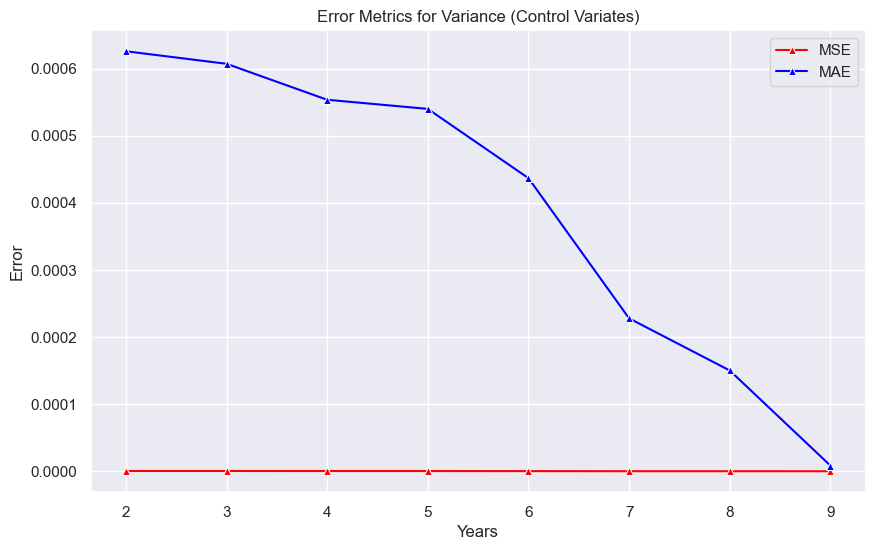

In [137]:
## Calculate error metrics for variance using control variates
MSE_varMC_cv = []
MAE_varMC_cv = []

for key in var_CV:
    error = ErrorMetrics(var_mvp, var_CV[key])
    MSE_varMC_cv.append(error.MSE())
    MAE_varMC_cv.append(error.MAE())

## Print the error metrics
print('MSE of Variance (MC Control Variates):', MSE_varMC_cv)
print('MAE of Variance (MC Control Variates):', MAE_varMC_cv)

## Plot MSE and MAE for variance for years in range 2 to 8 using seaborn library
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(var_CV.keys()), y=MSE_varMC_cv, color='red', label='MSE', marker='^')
sns.lineplot(x=list(var_CV.keys()), y=MAE_varMC_cv, color='blue', label='MAE', marker='^')
plt.xlabel('Years')
plt.ylabel('Error')
plt.title('Error Metrics for Variance (Control Variates)')
plt.legend()
plt.show()

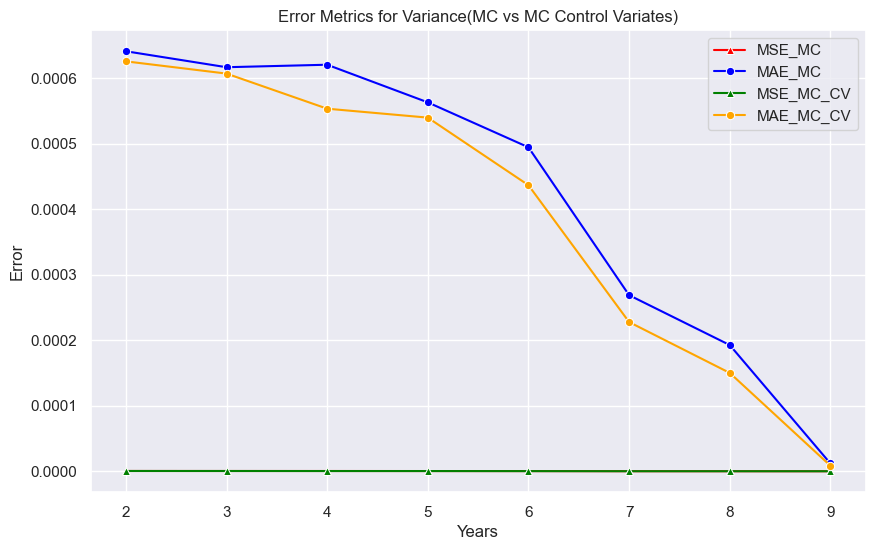

In [138]:
## Plot comparison of MSE and MAE for variance in MC and MC_control_variates for years
plt.figure(figsize=(10, 6))
sns.lineplot(x = range(2,10), y = MSE_varMC, color = 'red', label = 'MSE_MC', marker = '^')
sns.lineplot(x = range(2,10), y = MAE_varMC, color = 'blue', label = 'MAE_MC', marker = 'o')
sns.lineplot(x = range(2,10), y = MSE_varMC_cv, color = 'green', label = 'MSE_MC_CV', marker = '^')
sns.lineplot(x = range(2,10), y = MAE_varMC_cv, color = 'orange', label = 'MAE_MC_CV', marker = 'o')
plt.xlabel('Years')
plt.ylabel('Error')
plt.title('Error Metrics for Variance(MC vs MC Control Variates)')
plt.legend()
plt.show()

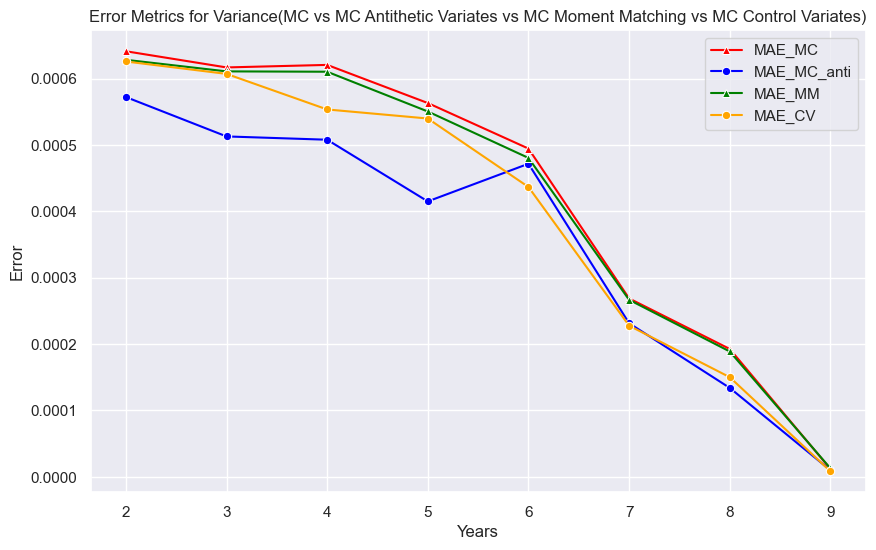

In [139]:
## Plot comparison of MAE for variance in MC, MC_antithetic_variates, MC_moment_matching and MC_control_variates for years
plt.figure(figsize=(10, 6))
sns.lineplot(x = range(2,10), y = MAE_varMC, color = 'red', label = 'MAE_MC', marker = '^')
sns.lineplot(x = range(2,10), y = MAE_varMC_anti, color = 'blue', label = 'MAE_MC_anti', marker = 'o')
sns.lineplot(x = range(2,10), y = MAE_varMC_MM, color = 'green', label = 'MAE_MM', marker = '^')
sns.lineplot(x = range(2,10), y = MAE_varMC_cv, color = 'orange', label = 'MAE_CV', marker = 'o')
plt.xlabel('Years')
plt.ylabel('Error')
plt.title('Error Metrics for Variance(MC vs MC Antithetic Variates vs MC Moment Matching vs MC Control Variates)')
plt.legend()
plt.show()

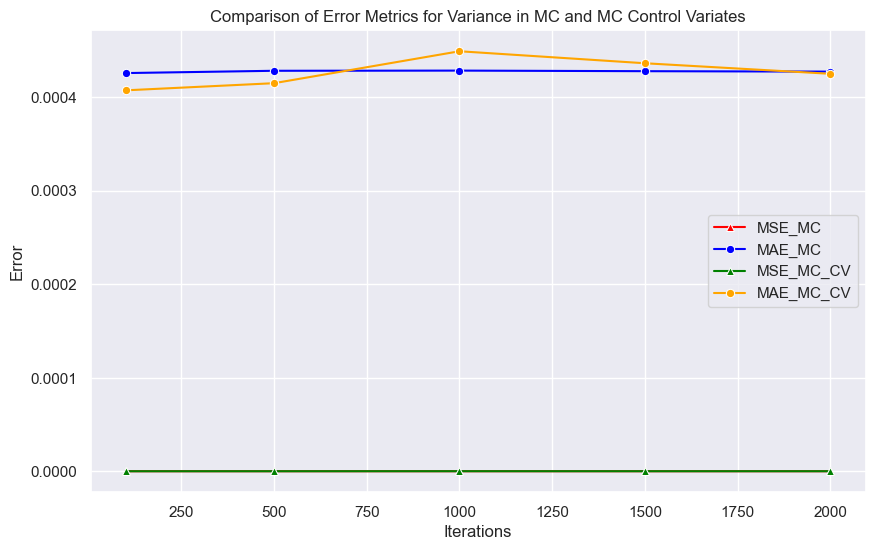

In [140]:
## Simulate MC and MC_control_variates for 100, 500, 1000, 1500, 2000 iterations and plot comparison of the error metrics
iterations = [100, 500, 1000, 1500, 2000]
MSE_varMC_sim3 = []
MAE_varMC_sim3 = []
MSE_varMC_CV_sim = []
MAE_varMC_CV_sim = []

for i in iterations:

    methods_sim = VarianceReduction(MVP, i, 2400)
    Er, W, var = methods_sim.MC()
    Er_cv, W_cv, var_cv = methods_sim.MC_control_variates()

    # Calculate the average error metrics for all keys
    mse_mc = np.mean([ErrorMetrics(var_mvp, var[key]).MSE() for key in var])
    mae_mc = np.mean([ErrorMetrics(var_mvp, var[key]).MAE() for key in var])
    mse_cv = np.mean([ErrorMetrics(var_mvp, var_cv[key]).MSE() for key in var_cv])
    mae_cv = np.mean([ErrorMetrics(var_mvp, var_cv[key]).MAE() for key in var_cv])

    MSE_varMC_sim3.append(mse_mc)
    MAE_varMC_sim3.append(mae_mc)
    MSE_varMC_CV_sim.append(mse_cv)
    MAE_varMC_CV_sim.append(mae_cv)

# Plot comparison of the error metrics
plt.figure(figsize=(10, 6))
sns.lineplot(x=iterations, y=MSE_varMC_sim3, color='red', label='MSE_MC', marker='^')
sns.lineplot(x=iterations, y=MAE_varMC_sim3, color='blue', label='MAE_MC', marker='o')
sns.lineplot(x=iterations, y=MSE_varMC_CV_sim, color='green', label='MSE_MC_CV', marker='^')
sns.lineplot(x=iterations, y=MAE_varMC_CV_sim, color='orange', label='MAE_MC_CV', marker='o')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Comparison of Error Metrics for Variance in MC and MC Control Variates')
plt.legend()
plt.show()

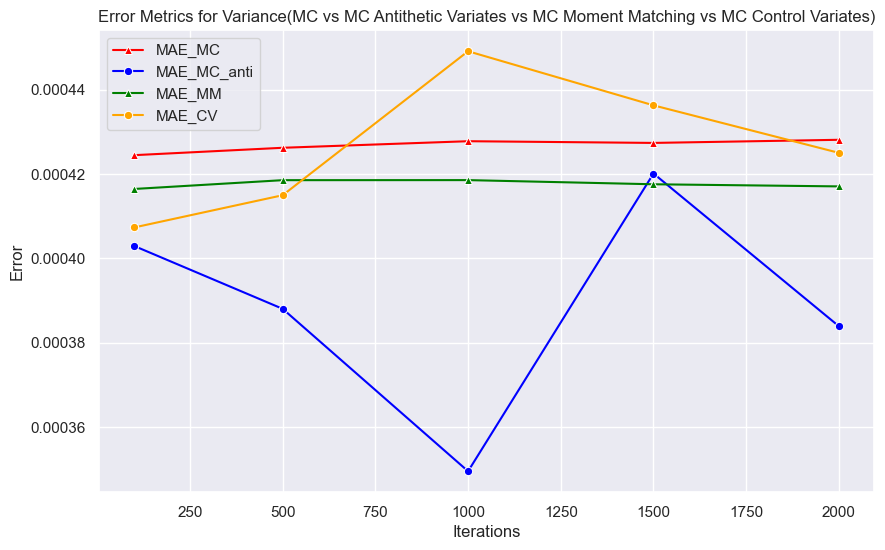

In [141]:
### PLot comparison of MAE for variance in MC , MC_antithetic_variates, MC_moment_matching and MC_control_variates for iterations
plt.figure(figsize=(10, 6))
sns.lineplot(x = iterations, y = MAE_varMC_sim2, color = 'red', label = 'MAE_MC', marker = '^')
sns.lineplot(x = iterations, y = MAE_varMC_anti_sim, color = 'blue', label = 'MAE_MC_anti', marker = 'o')
sns.lineplot(x = iterations, y = MAE_varMC_sim_MM, color = 'green', label = 'MAE_MM', marker = '^')
sns.lineplot(x = iterations, y = MAE_varMC_CV_sim, color = 'orange', label = 'MAE_CV', marker = 'o')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Error Metrics for Variance(MC vs MC Antithetic Variates vs MC Moment Matching vs MC Control Variates)')
plt.legend()
plt.show()

In [152]:
## Calculating average MAE variance reduction for MC_antithetic_variates, MC_moment_matching and MC_control_variates over MC
MAE_varMC_anti_avg = np.mean(MAE_varMC_anti)
MAE_varMC_MM_avg = np.mean(MAE_varMC_MM)
MAE_varMC_CV_avg = np.mean(MAE_varMC_cv)
MAE_varMC_avg = np.mean(MAE_varMC)

## Calculating percentage reduction in MAE for MC_antithetic_variates, MC_moment_matching and MC_control_variates over MC
perc_reduction_anti = ((MAE_varMC_avg - MAE_varMC_anti_avg) / MAE_varMC_avg) * 100
perc_reduction_MM = ((MAE_varMC_avg - MAE_varMC_MM_avg) / MAE_varMC_avg) * 100
perc_reduction_CV = ((MAE_varMC_avg - MAE_varMC_CV_avg) / MAE_varMC_avg) * 100

print(f'Average reduction in MAE for variance over normal Monte Carlo (Antithetic variates): {perc_reduction_anti:0.2f}%')
print(f'Average reduction in MAE for variance over normal Monte Carlo (Moment Matching): {perc_reduction_MM:0.2f}%')
print(f'Average reduction in MAE for variance over normal Monte Carlo (Control Variates): {perc_reduction_CV:0.2f}%')

Average reduction in MAE for variance over normal Monte Carlo (Antithetic variates): 16.27%
Average reduction in MAE for variance over normal Monte Carlo (Moment Matching): 1.78%
Average reduction in MAE for variance over normal Monte Carlo (Control Variates): 7.64%
